In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import scispacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
STOP_WORDS = spacy.lang.en.stop_words.STOP_WORDS
nlp = spacy.load("en_core_sci_lg")

## Similarity analysis for variable matching 

We are using scispaCy package, which contains spaCy models for biomedical, scientific clinical text analysis. spaCy is a package for Natural Language Processing compatible with tensorflow, pytorch, sklearn, keras and other machine learning frameworks.

Visit their website to consult the available models:
- https://allenai.github.io/scispacy/

We selected the "en_core_sci_lg" model for this task: 
- *A full spaCy pipeline for biomedical data with a larger vocabulary and 600k word vectors.*

In [38]:
def compare_codebooks(A, B, column):
    """
    Compare the codebooks A and B by the selected column and
    returns a matrix of similarities N x M, where N and M are the lengths
    of column A and B respectively.
    
    :param A: pandas dataframe
    :param B: pandas dataframe
    :param column: selected column for comparison
    :return sim_matrix: matrix of similarities
    """
    
    sim_matrix = np.zeros((len(A[column]), len(B[column])))
    
    for  n, item_1 in enumerate(A[column]):
        
        doc1 = nlp(str(item_1))
        
        for m, item_2 in enumerate(B[column]):
            
            doc2 = nlp(str(item_2))
            sim_matrix[n, m] = doc1.similarity(doc2)
            
    return sim_matrix


def find_similars(sim_matrix, A, B, column, threshold):
    """
    Printout the rows of A and B with similarity higher than threshold
    
    :param sim_matrix: similarity matrix
    :param A: Codebook A dataframe
    :param B: Codebook B detaframe
    :param column: e.g. Data description
    :param threshold: minimum similarity to be considered (0-1)
    """
    
    print("A  B  Similarity (0-1)")
    for n in range(0, len(A[column])):
        for m in range(0, len(B[column])):
            if sim_matrix[n, m]>threshold and A[column][n]==A[column][n]:
                print(n, m, sim_matrix[n, m])

In [7]:
# create list of codebooks
Codebooks = os.listdir('./Codebooks')

In [48]:
print("file, descriptions/variables")
for codebook in Codebooks:
    
    if 'csv' in codebook:
        df = pd.read_csv("Codebooks/"+codebook)
        
        print(codebook, 
              str(df['Data description'].count()-df['Data description'].isna().sum())+"/"+str(df['Data description'].count()))
        
        

file, descriptions/variables
UMM_05.csv 3/5
CSS.csv 166/172
UMM_04.csv 25/30
UMM_06.csv 7/12
UMM_03.csv 30/33
UMM_02.csv 30/35
HN5000.csv 18/24
UMM_01.csv 29/32
INT.csv 166/172


In [49]:
column = "Data description"  # select the column we will compare betweem the codebooks
A = pd.read_csv("Codebooks/INT.csv")  # read codebooks
B = pd.read_csv("Codebooks/UMM_01.csv")
#HN5000 = pd.read_excel("codebooks/HN5000.xlsx")

similarity_matrix = compare_codebooks(A, B, column)  # compute the similarity matrix

<AxesSubplot:>

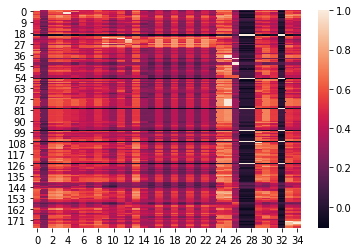

In [53]:
sns.heatmap(similarity_matrix)

In [54]:
find_similars(similarity_matrix, A, B, column, 0.9)  # find the indexes of similar variables

A  B  Similarity (0-1)
0 0 1.0
2 4 1.0
22 9 0.9232529047423417
23 11 1.0
24 12 0.9543325099629136
27 9 0.900156498266542
37 25 0.998840978019322
38 25 0.9930410940962157
39 26 1.0
43 26 1.0
44 26 1.0
73 25 0.9942783673566482
74 25 0.9902075514378691
75 25 0.9932864553757522
76 25 0.9942783673566482
77 25 0.9902075514378691
78 25 0.9932864553757522
108 29 0.9584247629323039
173 33 1.0
174 34 0.9999999893015317


In [51]:
# inspect the variables
n, m = 27, 9
A[column][n],"\n", B[column][m]

("An indication of a person's current alcohol consumption as well as some indication of alcohol consumption history.",
 '\n',
 "An indication of a person's current tobacco and nicotine consumption")

In [52]:
doc1 = nlp(str(A[column][n]))
doc2 = nlp(str(B[column][m]))

displacy.render(next(doc1.sents), style='dep', jupyter=True)